- How indexing works in sets
- Why dict key cant be mutable data types
- Enumerate
- destructor
- dir/isinstance/issubclass
- classmethod vs staticmethod
- The diamond problem
- What’s the meaning of single and double underscores in Python variable and method names
- Magic Methods (repr vs str)
- How can objects be stored in sets even though they are mutable

In [4]:
s = {21,34,11,56,39}
s

{11, 21, 34, 39, 56}

In [3]:
d = {(1,2,3):'nitish'}
d

{(1, 2, 3): 'nitish'}

In [ ]:
d = {[1,2,3]:'nitish'}
d

TypeError: ignored

### enumerate

In [13]:
# The enumerate() method adds a counter to an iterable and returns it (the enumerate object).

L = [('nitish',45),('ankit',31),('ankita',40)]

# sorted(L)
# sorted(L, key = lambda x:x[1])
sorted(L, key = lambda x:x[1], reverse=True)

[('nitish', 45), ('ankita', 40), ('ankit', 31)]

In [14]:
sorted?

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method

In [7]:
L = [15,21,13,45]
list(enumerate(L))

[(0, 15), (1, 21), (2, 13), (3, 45)]

In [9]:
L = [15,21,13,45]
list(enumerate(L, start = 10))

[(10, 15), (11, 21), (12, 13), (13, 45)]

In [10]:
L = [15,21,13,13]
list(enumerate(L))

[(0, 15), (1, 21), (2, 13), (3, 13)]

In [ ]:
L = [15,21,13,13]
sorted(list(enumerate(L)),reverse=True)

[(3, 13), (2, 13), (1, 21), (0, 15)]

### destructor

```
- opposite of constructor
- contructor is called when object is created
- destructor is called when object is deleted
- destuctor tab tak call nahi hota jab tak sare object ke reference memeory se delete nahi ho jate.
- inside destructor code for database close, file close, internet close, bluetooth close
after used are written.
- destructor not used generally because exception handling and garbage collector do the same.
```

In [34]:
class Example:

  def __init__(self):
    print('constructor called')

  # destructor --> magic method
  def __del__(self):
    print('destructor called')

obj = Example()
obj2 = Example()

a = obj
del obj
del a
del obj2

constructor called
constructor called
destructor called
destructor called


### dir/isinstance/issubclass

#### name mangling: __balance --> _ATM__balance

In [35]:
# dir

class Test:
    
    def __init__(self):
        self.foo = 11
        self._bar = 23
        self.__baz = 23

    def greet(self):
      print('hello')

t = Test()
print(dir(t)) # This gives us a list with the object’s attributes

['_Test__baz', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bar', 'foo', 'greet']


In [38]:
# isinstance

class Example:

  def __init__(self):
    print('hello')

obj = Example()

isinstance(obj,Example)

hello


True

In [41]:
# issubclass

class A:
  def __init__(self):
    pass

class B(A):
  pass

issubclass(B,A)
# issubclass(A,B)

True

### classmethod
- A class method is a method that is bound to the class and not the object of the class.
- They have the access to the state of the class as it takes a class parameter that points to the class and not the object instance.
- It can modify a class state that would apply across all the instances of the class. For example, it can modify a class variable that will be applicable to all the instances.

### staticmethod
A static method does not receive an implicit first argument. A static method is also a method that is bound to the class and not the object of the class. This method can’t access or modify the class state. It is present in a class because it makes sense for the method to be present in class.

In [ ]:
class A:

  def normal_m(self):
    print('normal method')

  @staticmethod
  def static_m():
    print('static method')

  @classmethod
  def class_m(cls):
    print('class method')

In [ ]:
a = A()

# normal -> object -> callable
a.normal_m()
# class -> object -> callable
a.class_m()
# static -> object -> not callable
a.static_m()

normal method
class method
static method


In [ ]:
# static -> class -> callable
A.static_m()
# class method -> class -> callable
A.class_m()
# normal -> class -> not callable
A.normal_m()

static method
class method


TypeError: ignored

In [ ]:
# Alternate syntax
A.normal_m(a)

### Class method vs Static Method<br>
The difference between the Class method and the static method is:

- A class method takes cls as the first parameter while a static method needs no specific parameters.
- A class method can access or modify the class state while a static method can’t access or modify it.
- In general, static methods know nothing about the class state. They are utility-type methods that take some parameters and work upon those parameters. On the other hand class methods must have class as a parameter.
- We use @classmethod decorator in python to create a class method and we use @staticmethod decorator to create a static method in python.

### When to use the class or static method?
- We generally use the class method to create factory methods. Factory methods return class objects ( similar to a constructor ) for different use cases.
- We generally use static methods to create utility functions.

### The diamond problem

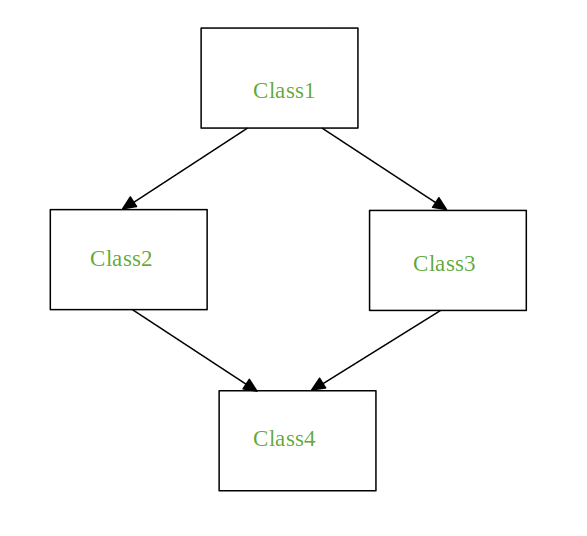

In [45]:
# The diamond problem
class Class1:
    def m(self):
        print("In Class1")

class Class2(Class1):
    def m(self):
        print("In Class2")

class Class3(Class1):
    def m(self):
        print("In Class3")

class Class4(Class3, Class2):
    pass

obj = Class4()
obj.m()
# MRO

In Class3


### Magic Methods (repr vs str)

In [47]:
a = 'hello'

print(str(a))
print(repr(a)) # representation

hello
'hello'


In [48]:
import datetime

a = datetime.datetime.now()
b = str(a)

print(str(a))
print(str(b))

print(repr(a))
print(repr(b))

2024-07-10 16:53:07.210313
2024-07-10 16:53:07.210313
datetime.datetime(2024, 7, 10, 16, 53, 7, 210313)
'2024-07-10 16:53:07.210313'


#### In summary

- str is for users --> meant to be more readable
- repr is for developers for debugging --> for being unambigous

### How can objects be stored in sets even though they are mutable

https://stackoverflow.com/questions/31340756/python-why-can-i-put-mutable-object-in-a-dict-or-set

In [52]:
class A:

  def __init__(self):
    print('constructor')

  def hello(self):
    print('hello')

a = A()
# a.hello()

s = {a}
print(s)
dir(a)

constructor
{<__main__.A object at 0x000002A561CE4FE0>}


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'hello']

In [50]:
s = {[1,2,3,4,5]}

TypeError: unhashable type: 'list'

In [53]:
L = [1,2,3]
dir(L)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [57]:
class A:

  def __init__(self):
    print('constructor')

  def __eq__(self):
    pass

  def __hash__(self):
    # return 1
      pass

  def hello(self):
    print('hello')

a = A()
a.hello()
s = {a}
print(s)

dir(a)

constructor
hello


TypeError: __hash__ method should return an integer

In [58]:
class A:

  def __init__(self):
    print('constructor')

  def __eq__(self):
    pass

  def __hash__(self):
    return 1

  def hello(self):
    print('hello')

a = A()
a.hello()
s = {a}
print(s)

dir(a)

constructor
hello
{<__main__.A object at 0x000002A561C928D0>}


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'hello']

In [46]:
class A:

  def __init__(self):
    self._var = 10

a = A()
a._var

10

In [ ]:
s = {[1,2]}

TypeError: ignored

In [ ]:
L = [1,2,3]
s = {L}

TypeError: ignored

In [61]:
print(L.__hash__())

TypeError: 'NoneType' object is not callable

In [62]:
hash(1)

1

In [63]:
hash('hello')

5701897300682991962

In [66]:
hash((1,2,3))

529344067295497451

In [65]:
hash([1,2,3])

TypeError: unhashable type: 'list'

In [67]:
hash({1:1,2:2})

TypeError: unhashable type: 'dict'